### Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import random
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FuncFormatter

from montecarlo import create_sp_return_generator, create_housing_return_generator, last_entry, REAsset, StockAsset, one_sim

%matplotlib inline

In [2]:
def alternate_formatter(x, ind):
    rm = np.mod(x, 1)
    if np.abs(rm) < .1:
        return '{:d}'.format(int(x))
    return '{:.1f}'.format(rm)

In [3]:
data = []
for epoch in range(1, 1000):
    _, ROI_P1 = one_sim(380_000, 25, 30, verbose=0)
    _, ROI_P2 = one_sim(0, 25, 30, verbose=0)
    _, ROI_P3 = one_sim(450_000, 25, 30, verbose=0)
    data.append({'Epoch': epoch, 'ROI_P1': ROI_P1, 'ROI_P2': ROI_P2, 'ROI_P3': ROI_P3})
results = pd.DataFrame(data)

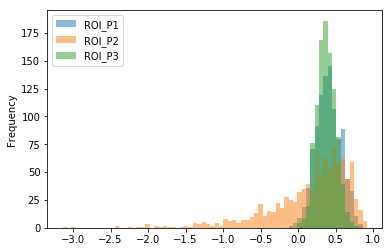

In [8]:
ax = results[['ROI_P1', 'ROI_P2', 'ROI_P3']].plot.hist(bins=70, alpha=0.5)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
#ax.xaxis.set_major_formatter(FuncFormatter(alternate_formatter))

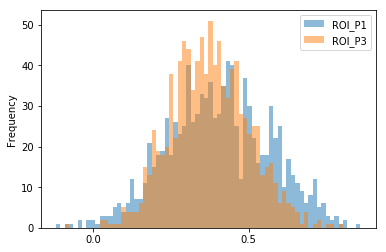

In [9]:
ax = results[['ROI_P1', 'ROI_P3']].plot.hist(bins=70, alpha=0.5)
ax.xaxis.set_major_locator(MultipleLocator(0.5))